# L2: Enzyme Kinetics

## Overview

Our goal is to gain a deeper understanding of the Michaelis Menten equation that describes enzyme kinetics. In part 1, we will start by simulating the dynamics of the reactants and products of an enzymatic reaction using this equation. Next we will visualize the Michaelis Menten curve and relate different regions of the curve to different types of dynamics. In part 2, we will work through the Briggs and Haldane derivation of the Michaelis Menten equation. We will explore the assumptions that go into this derivation and the limitations of the Michaelis Menten equation.

For additional reading on this topic see: Klipp, Systems Biology: A Textbook, Section 4.1

In [38]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [50]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Part 1: The Michealis Menten Equation

Leonor Michaelis and Maude Menten pioneered the use of a simple equation to describe the rates of enzyme driven reactions. The classic Michaelis Menten equation is given as follows:

$V = \frac{d[B]}{dt} = V_{max}\frac{[A]}{K_{M}+[A]}$ (using the variable names for reacant [A] and product [B] concentrations from Briggs and Haldane)
* $V$: The reaction rate, of product (B) production
* $B$: The concentration of product B
* $V_{max}$: The maximum reaction rate
* $A$: The concentration of the reactant A
* $K_{M}$: The Michealis constant, also known as the half maximal rate concentration

The $V_{max}$ can also be further decomposed as $K_{cat}*[E]_{0}$, where $K_{cat}$ is the catalytic constant or turnover number and $[E]_{0}$ is the initial enzyme concentration.

### Michaelis Menten Simulation

Let's simulate the dynamics of the invertase reaction which was studied in the original Michaelis and Menten publication. We will look up the enzyme kinetic parameters using the [BRENDA database](https://www.brenda-enzymes.org/). BRENDA is a huge database of enzymes including kinetic constants for different organisms and substrates. 

*Side Note: Measuring enzyme kinetic constants for different enzymes, organisms, and substrates is a major bottleneck in the application of computational models of enzyme kinetics. Recently there has been renewed effort to predict enzyme kinetic constants directly from sequence using machine learning in a manner similar to the alphafold structure prediction approach.*

Invertase Reaction:
* $Sucrose + H_{2}O = Glucose + Fructose$

Kinetic Constants: There are a lot of options here that have been estimated for different organisms and substrates, we will use the [BRENDA estimates for *S. cerevisiae and sucrose*](https://www.brenda-enzymes.org/enzyme.php?ecno=3.2.1.26&Suchword=&reference=&UniProtAcc=&organism%5B%5D=Saccharomyces+cerevisiae&show_tm=0) from Lafraya *et al.* (below)
* $K_{cat}$: 3430 $[\frac{mM Substrate}{(mM Enzyme) * s}]$
* $K_{M}$: 38 [mM]


*Lafraya, A.; Sanz-Aparicio, J.; Polaina, J.; Marin-Navarro, J. Fructo-oligosaccharide synthesis by mutant versions of Saccharomyces cerevisiae invertase (2011), Appl. Environ. Microbiol., 77, 6148-6157.*

### Simulate MM Dynamics
We will use the scipy solve_ivp library to simulate the ordinary differential equation described by the Michealis Menten equation. Here we can simulate the dynamics of the reactant (A) and product (B) with different parameters.

In [51]:
# Constants
K_cat = 3430
# K_M = 38
K_M = 100
# Variables
E_0 = 10e-3
# ODE
def MM_dynamics(t,y,K_cat,K_M,E_0):
    # y[0] = B product
    # y[1] = A reactant
    dydt = np.zeros(2)
    v = K_cat*E_0*(y[1]/(K_M+y[1]))
    dydt[0] = v
    dydt[1] = -v
    return dydt

In [52]:
# Initial Conditions
y0 = [0,100]
# time span
t = np.linspace(0,10,100)
tspan = [t[0],t[-1]]

ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)

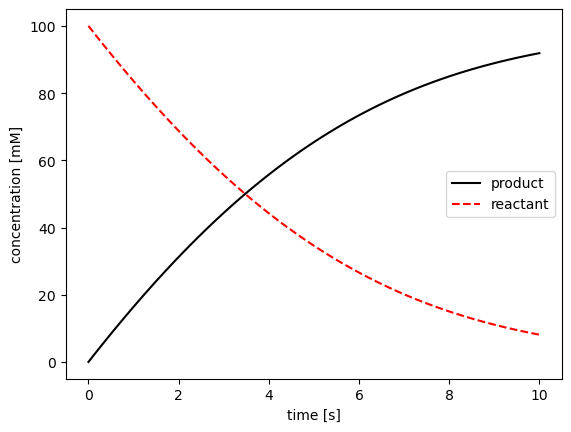

In [53]:
plt.plot(t,ode_sol.y[0],'k-')
plt.plot(t,ode_sol.y[1],'r--')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['product','reactant']);

### QUESTION 1:
1. Try running the simulation for a few different initial reactant amounts (change the time spans to capture the curves if you need to).
   * a) Include at least two plots with different initial reactant concentrations in your answer. You should be able to right click and "copy output to clipboard" to paste figures into your report.
   * b) Describe the shape of the curve, how would you describe the rate of product production (the slope of the black product line) as a function of the total amount of reactant (dotted red line)?
   * c) How does the shape of the curve relate to the value $K_{M}$?

### Simulate MM Dynamics (half lives)
A different type of dynamic decay (exponential decay) often arises in nature. For example, in radioactive decay. In exponential decay the rate is proportional to the amount of reactant remaining. Exponential decay can be characterized by a half life (the time it takes for half of the remaining reactant to decay) which is constant. Here we will explore the Michaelis Menten kinetics to see if the same half life principle applies.

The code below calculates the time to decay a given initial amount of reactant from 100% to 50% and from 50% to 25%. Calculating these two "half-lives" with different initial reactant concentrations will give us insight into how this property behaves in different regimes of the Michaelis Menten curve.

10 mM initial reactant, time from 100% to 50%:  2.17 seconds
10 mM initial reactant, time from 50% to 25%: 2.09 seconds


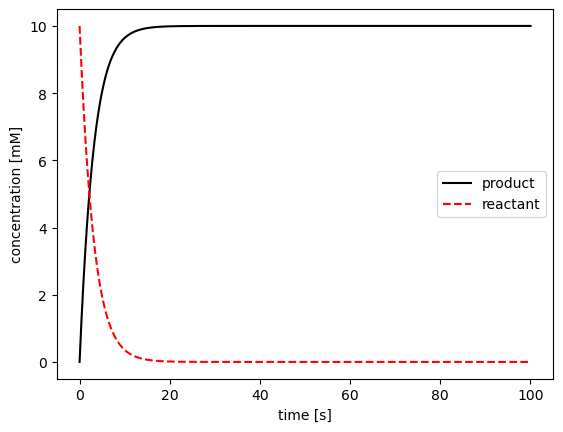

In [54]:
# Simulate initial reactant concentration
r_conc = 10

# time span
t = np.linspace(0,100,10000)
tspan = [t[0],t[-1]]

# Initial Conditions
y0 = [0,r_conc]
ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)
r = ode_sol.y[1] #reactant concentration

# Plot to make sure simulation has run for long enough
plt.plot(t,ode_sol.y[0],'k-')
plt.plot(t,ode_sol.y[1],'r--')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['product','reactant']);

# Calculate time from 100% to 50%
t100_50 = t[np.argmin(np.abs(r-r[0]*.5))]
print(str(r_conc),'mM initial reactant, time from 100% to 50%: ',np.round(t100_50,2),'seconds')

# Calculate time from 50% to 25%
t50_25 = t[np.argmin(np.abs(r-r[0]*0.25))]-t[np.argmin(np.abs(r-r[0]*.5))]
print(str(r_conc),'mM initial reactant, time from 50% to 25%:',np.round(t50_25,2),'seconds')


### Question 2:
2. Run the above simulation for different initial concentrations of reactant ranging from 1 mM to 3000 mM. Note: make sure to update the timespan to capture the full dynamics of the simulation (at least until 25% of reactant remains).
   * a) How do the "half-lives" for 100% to 50% vs. 50% to 25% compare for initial concentrations well above $K_M$?
   * b) How do the "half-lives" for 100% to 50% vs. 50% to 25% compare for initial concentrations well below $K_M$?
   * c) Provide a brief explanation for your results.

### Plotting the MM Curve
In this section we will plot the reaction rate ($V$) as a function of reactant concentration ($A$). This is a common way of plotting the Michaelis Menten equation to illustrate the different regions of the equation.

In [55]:
# Same parameters as before
K_cat = 3430
K_M = 38
# Variables
E_0 = 10e-3
# Range of reactant concentrations
A = np.linspace(0,1000,1000)
# Calculate rate from MM equation
v = K_cat*E_0*(A/(K_M+A))
V_max = K_cat * E_0

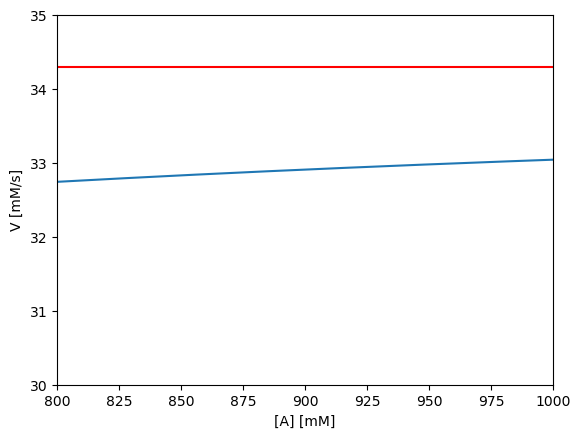

In [56]:
# plot
plt.plot(A,v)
plt.xlabel('[A] [mM]')
plt.ylabel('V [mM/s]')
plt.xlim([0,1000])
plt.ylim([0,40])

# #3a
plt.xlim([0,10])
plt.ylim([0,10])

#3b
plt.xlim([800,1000])
plt.ylim([30,35]);

plt.hlines(V_max,0,1000, 'r')
plt.vlines(K_M,0,40, 'r')


### Questions 3 and 4:
3. Describe regions of the curve. How does the rate depend on the concentration at different regions of substrate concentration [A]? Zoom in on the plot (by replotting with different x and y limits) and think about how this relates to the previous questions.
   * a) For the region between [A] = 0 to 10 mM
   * b) For the region between [A] = 800 to 1000 mM
4. Plot lines to indicate the $V_{max}$ and $K_{M}$ on the Michaelis Menten curve.
   * a) Include this plot in your report.
   * b) Describe how is the curve is bounded by these quantities?

### Bonus: Lineweaver-Burk Plot
Here, we will plot the reciprocal of the reaction rate, $\frac{1}{V}$, as a function of the reciprocal of the reactant concentration, $\frac{1}{[A]}$. This plot is known as the Lineweaver-Burk plot and is often used to simplify the estimate the kinetic parameters.


Text(0, 0.5, '1/V')

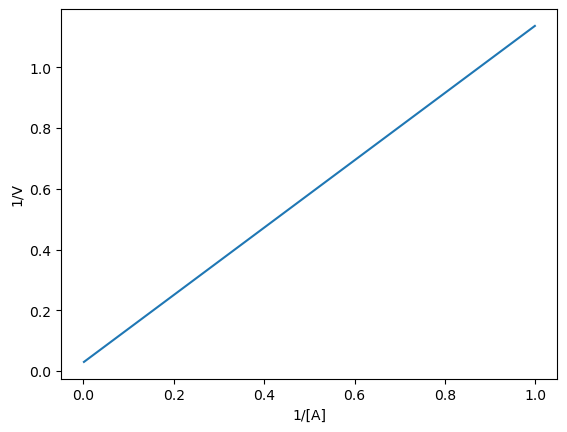

In [57]:
# plot
plt.plot(1/A[1:],1/v[1:]) #we won't plot the first point to avoid a divide by 0 warning
plt.xlabel('1/[A]')
plt.ylabel('1/V')

We can see that plotting the curve on these axis yeilds a straight line. This is easier to interperet by hand and to fit with linear methods. For this plot, the y intercept corresponds to 1/vmax, the x intercept to -1/KM, and the slope to KM/vmax.

Let's rearange the Michaelis Menten equation to show that this is the case

$V = V_{max}\frac{[A]}{K_{M}+[A]}$ 

$\frac{1}{V} = \frac{K_{M}+[A]}{V_{max}[A]}$

$\frac{1}{V} = \frac{K_{M}}{V_{max}}\frac{1}{[A]}+\frac{1}{V_{max}}$

From this equation we can see that a line is given with the previously mentioned slope and intercepts.

## Part 2: The Briggs Haldane Derivation

In this part, we will investigate the derivation of the Michaelis Menten equation as presented in the Briggs and Haldane paper. We will gain an understanding of where this equation comes from, what assumptions are made in its derivation, and what the implications of those assumptions are.

The reactions schema for the derivation is given below, where A and B are the reactants and products. E is the free enzyme and AE is the enzyme/reactant complex.

$A + E \underset{k_{2}}{\overset{k_{1}}{\rightleftharpoons}} AE \overset{k_{3}}{\rightharpoonup} B + E$

Several variables are defined for the equation:
* $a$: initial concentration of reactant A
* $e$: total concentration of enzyme E
* $x$: the concentration of product B after time $t$
* $p$: the concentration of enzyme/reactant complex at time $t$

Mass action kinetics (rate of change of enzyme reactant complex):

$\frac{dp}{dt}=k_{1}(a-x)(e-p)-k_{2}p-k_{3}p$

Assumption $\frac{dp}{dt}=0$

$k_{1}(a-x)(e-p)-k_{2}p-k_{3}p=0$

$k_{1}(a-x)(e-p)=p(k_{2}+k_{3})$

$(e-p)=p\frac{k_{2}+k_{3}}{k_{1}(a-x)}$

$\frac{e}{p}=\frac{k_{2}+k_{3}}{k_{1}(a-x)}+1$

$p = \frac{e}{\frac{k_{2}+k_{3}}{k_{1}(a-x)}+1}$

$p=\frac{e(a-x)}{a-x+\frac{k_{2}+k_{3}}{k_{1}}}$

From mass action kinetics (rate of change of product):

$\frac{dx}{dt}=k_{3}p$

The Michealis Menten Form of the Equation:

<font size="5">$\frac{dx}{dt}=\frac{k_{3}e(a-x)}{a-x+\frac{k_{2}+k_{3}}{k_{1}}}$</font>

Where:
* $x=[B]$
* $\frac{dx}{dt}=V$
* $k_{3}e=V_{max}$, $k_{3}=K_{cat}$, $e=[E]_{0}$
* $\frac{k_{2}+k_{3}}{k_{1}}=K_{M}$
* $a-x=[A]$


### Simulate Mass Action Kinetics

Here we will define a function that describes the coupled ODEs for A, AE, and B and explicitely simulate their dynamics.

In [58]:
# Define mass action equations
def MA_dynamics(t,y,k_1,k_2,k_3,E_0):
    #y[0] = [A] reactant
    #y[1] = [AE] enzyme substrate complex
    #y[2] = [B] product
    dydt = np.zeros(3)
    
    dydt[0]=k_2*y[1]-k_1*y[0]*(E_0-y[1])
    dydt[1]=k_1*y[0]*(E_0-y[1])-k_2*y[1]-k_3*y[1]
    dydt[2]=k_3*y[1]
    
    return dydt

In [59]:
# Define parameters (Mass Action)
k_2 = 1000
k_3 = 3430
k_1 = (k_2+k_3)/38 #defined such that K_M = 38 as above
e = 1e-3
a = 100

In [60]:
# Simulate Mass Action Kinetics

# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]

# Initial Conditions
y0 = [a,0,0]
ode_sol = solve_ivp(lambda t,y:MA_dynamics(t,y,k_1,k_2,k_3,e),tspan,y0,t_eval=t)


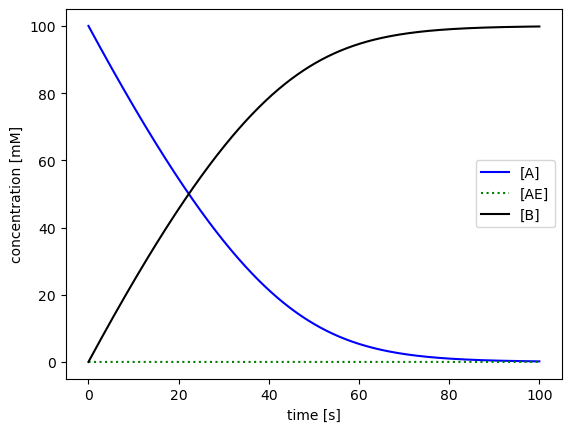

In [61]:
# Plot
plt.plot(t,ode_sol.y[0],'b')
plt.plot(t,ode_sol.y[1],'g:')
plt.plot(t,ode_sol.y[2],'k')
plt.xlabel('time [s]')
plt.ylabel('concentration [mM]')
plt.legend(['[A]','[AE]','[B]']);


### Compare Michaelis Menten and Mass Action

Here we will simulate the mass action kinetics and corresponding Michaelis Menten kinetics. We will plot both curves for the reactant concentration on the same plot to see if they diverge.

In [85]:
# Define parameters (Mass Action)
k_2 = 1000
k_3 = 3430
k_1 = (k_2+k_3)/38 #defined such that K_M = 38 as above
e = 100
# e = 1e-3
a = 10 # a = 100

In [110]:
# Simulate Mass Action Kinetics

# time span
t = np.linspace(0,10,100) # 100,1000
tspan = [t[0],t[-1]]

# Initial Conditions
y0 = [a,0,0]
ode_sol = solve_ivp(lambda t,y:MA_dynamics(t,y,k_1,k_2,k_3,e),tspan,y0,t_eval=t)
r_MA_2 = ode_sol.y[0] #reactant concentration


In [111]:
# Define parameters (Michaelis Menten)
K_cat = k_3
K_M = (k_2+k_3)/k_1
E_0 = e

In [112]:
# Simulate Michaelis Menten Kinetics

# same time span as above

# Initial Conditions
y0 = [0,a]
ode_sol = solve_ivp(lambda t,y:MM_dynamics(t,y,K_cat,K_M,E_0),tspan,y0,t_eval=t)
r_MM = ode_sol.y[1] #reactant concentration


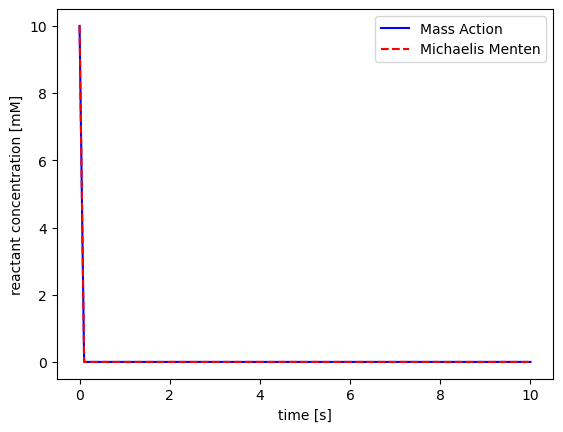

In [113]:
# Plot
# plt.plot(t,r_MA,'k')
plt.plot(t,r_MA_2,'b')
plt.plot(t,r_MM,'r--')
plt.xlabel('time [s]')
plt.ylabel('reactant concentration [mM]')
plt.legend(['Mass Action','Michaelis Menten']);

### Questions 5 and 6:
5. Simulate mass action and Michaelis Menten kinetics for a range of total enzyme concentrations (e) and initial reactant concentrations (a). Start by leaving `[a]` constant and increasing e. You will have to make the time span for the simulation very short to capture the dynamics.
   * a) When do the two simulations diverge in their predictions?
   * b) How is this related to the assumptions from Briggs and Haldane?
   * c) Include a plot demonstrating the two simulations diverging.

6. We should see from this simulation that the Michaelis Menten equation is not correct 100% of the time.
   * a) What is one limitation of the Michaelis Menten equation that could limit its accuracy?
   * b) Why is the Michealis Menten equation still used to represent enzyme kinetics, despite its limitations?
   * c) We know from thermodynamics that a reaction will proceed until the product and reactant are in equilibrium. Does the Michaelis Menten kinetics obey this equilibrium principle? Explain your answer.